In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import read_out, get_input_output_lin, load_lins

Load the turbulent wind 8m/s simulation, dropping the first 300 seconds:

In [2]:
df = read_out("../runs/baseline_8ms/seed00/5MW_Land_DLL_WTurb_fixedspeed_toweronly.out").loc[300:]

In [3]:
df.columns

Index(['Wind1VelX', 'Wind1VelY', 'Wind1VelZ', 'OoPDefl1', 'IPDefl1',
       'TwstDefl1', 'BldPitch1', 'Azimuth', 'RotSpeed', 'GenSpeed', 'TTDspFA',
       'TTDspSS', 'TTDspTwst', 'Spn2MLxb1', 'Spn2MLyb1', 'RootFxb1',
       'RootFyb1', 'RootFzb1', 'RootMxb1', 'RootMyb1', 'RootMzb1', 'RotThrust',
       'RotTorq', 'LSSGagMya', 'LSSGagMza', 'YawBrFxp', 'YawBrFyp', 'YawBrFzp',
       'YawBrMxp', 'YawBrMyp', 'YawBrMzp', 'TwrBsFxt', 'TwrBsFyt', 'TwrBsFzt',
       'TwrBsMxt', 'TwrBsMyt', 'TwrBsMzt', 'GenPwr', 'GenTq', 'BlPitchC1',
       'BlPitchC2', 'BlPitchC3'],
      dtype='object')

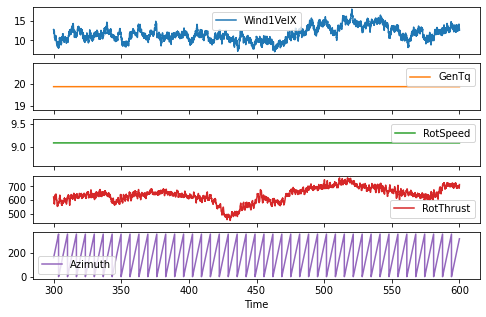

In [4]:
df[["Wind1VelX", "GenTq", "RotSpeed", "RotThrust", "Azimuth"]].plot(subplots=True, figsize=(8, 5));

Load the linearised data corresponding to this operating point (8m/s mean wind, constant generator speed):

In [5]:
lins = load_lins("linearised", [8.0], "trim_none_no_gen_dof")

Now let's extract the linearisation coefficients -- these are the indices of the relevant variables:

In [6]:
iu_wind = 0
iy_rotthrust = 20

print(lins.iloc[0]["u_info"]["Description"][iu_wind])
print(lins.iloc[0]["y_info"]["Description"][iy_rotthrust])

IfW Extended input: horizontal wind speed (steady/uniform wind), m/s
ED RotThrust, (kN)


In [7]:
F0, dF = get_input_output_lin(lins, iu_wind, iy_rotthrust)
F0[8.0], dF[8.0]

(473.6217803955, 48.463935853950005)

Now we can recreate the variation in rotor thrust predicted by the linearied model and compare it with the simulation:

In [8]:
def plot_comparison(sin, *lin_coeffs, title=""):
    t = sin.index
    for F0, dF in lin_coeffs:
        Flin = F0[8.0] + dF[8.0] * (sin["Wind1VelX"] - 8.0)
        plt.plot(t, Flin)
    plt.plot(t, sin["RotThrust"], 'k')
    plt.title(title)

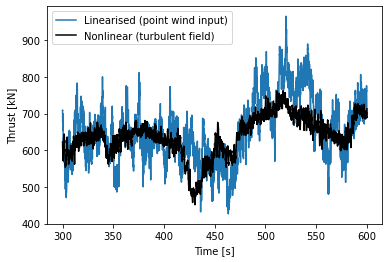

In [9]:
plot_comparison(df, (F0, dF))
plt.legend(["Linearised (point wind input)", "Nonlinear (turbulent field)"]);
plt.ylabel("Thrust [kN]");
plt.xlabel("Time [s]");

Why are the results different?
- The turbulent results are calculated for a full turbulent wind field with different velocities at different points in the rotor -- these cancel out to some extent to give the overall rotor thrust.
- The linearised results are based on uniform wind across the rotor.
- In addition, the linearised behaviour will not be exactly correct (even if it considered varying wind speed across the rotor).